<a href="https://colab.research.google.com/github/Dhonikena/Minor-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images


In [ ]:
from bing_image_downloader import downloader
downloader.download("polar bear species",limit = 50,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/polar bear species


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://allthatsinteresting.com/wordpress/wp-content/uploads/2016/08/polar-bear-family.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://all-that-is-interesting.com/wordpress/wp-content/uploads/2016/08/staring-polar-bear.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://all-that-is-interesting.com/wordpress/wp-content/uploads/2016/08/mom-protecting-cub.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://allthatsinteresting.com/wordpress/wp-content/uploads/2016/08/two-polar-bear-cubs.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.saymedia-content.com/.image/t_share/MTc2NDY2MzM1MzI3OTg2OTAx/polar-bears-are-losing-their-homes.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/28/66/8c/28668c41846bb0be31a47b96e672ba83.jpg
[%] File Downloaded 

In [ ]:
from bing_image_downloader import downloader
downloader.download("penguin species",limit = 50,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/penguin species


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://www.rd.com/wp-content/uploads/2020/01/emperor-penguins-brave-a-storm-in-the-antarctica-jan-2016.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://4.bp.blogspot.com/-pU5ZvS92JJc/TV94pCbT36I/AAAAAAAAAyw/Clbw1GB4Fi0/s1600/Chinstrap+Pe.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.worldatlas.com/r/w1200/upload/31/e8/b8/shutterstock-1214030362.jpg
[Error]Invalid image, not saving https://www.worldatlas.com/r/w1200/upload/31/e8/b8/shutterstock-1214030362.jpg

[!] Issue getting: https://www.worldatlas.com/r/w1200/upload/31/e8/b8/shutterstock-1214030362.jpg
[!] Error:: Invalid image, not saving https://www.worldatlas.com/r/w1200/upload/31/e8/b8/shutterstock-1214030362.jpg

[%] Downloading Image #3 from https://www.thoughtco.com/thmb/cZhWFIbY159WF1JfCe5vH-3C1_U=/2121x1414/filters:no_upscale():max_bytes(15

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR = '/content/images'
CATEGORIES = ['polar bear species','penguin species']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


<BarContainer object of 2 artists>

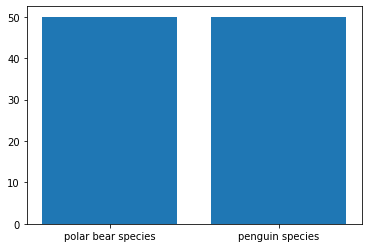

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

In [ ]:
from xgboost import XGBClassifier
model= XGBClassifier( gamma = 0,
                     subsample=1,
              learning_rate=0.1, 
              max_depth=3,  
              min_child_weight=1,
              n_estimators=100,
              random_state=0,
              reg_alpha=0, 
              reg_lambda=1
)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
from  sklearn.metrics import accuracy_score
print('Train accuracy', accuracy_score(y_train,y_train_pred))
print('Test accuracy', accuracy_score(y_pred,y_test))

Train accuracy 1.0
Test accuracy 0.7333333333333333


In [ ]:
import joblib
joblib.dump(model,'img_model')

['img_model']

In [ ]:
model = joblib.load('img_model')

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.8MB 8.1MB/s 
     |████████████████████████████████| 174kB 48.6MB/s 
     |████████████████████████████████| 4.2MB 35.3MB/s 
     |████████████████████████████████| 112kB 59.5MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 122kB 49.6MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15985 sha256=d07898b40172ac769c3eebc83e158fcc56e50791e2ecde1e143be80e5828c3bf
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [ ]:
%%writefile app.py

import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import joblib
from PIL import Image


st.title('Image Classification Deployment')
st.text('Upload the Image')

model = joblib.load('img_model')

uploaded_file = st.file_uploader("Choose an image..." , type="jpg" )
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['polar bear species','penguin species']
    st.write('Result...')
    flat_data = []   
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.write(f'PREDICTED OUTPUT : {y_out}') 
    r = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : { r[0][index]*100}')




Writing app.py


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://90fdfe8fdccc.ngrok.io'